# Law Admission ML Project

### **THIS IS A DRAFT NOTEBOOK**

In this project we'll try to predict the admission percentage for a given law school, based on hid details and ranks

## Data engineering

In [ ]:
import seaborn
import pydotplus

In [ ]:
import pandas as pd
import numpy as np

filepath = 'data/bar_pass_prediction.csv'
data = pd.read_csv(filepath, sep=',')

Data shape

In [ ]:
data.head()

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,hisp,pass_bar,bar,bar_passed,tier,index6040,indxgrp,indxgrp2,dnn_bar_pass_prediction,gpa
0,10.0,10.0,2,10.0,1.0,7.0,1.0,44.0,3.5,1.33,...,0,1,a Passed 1st time,True,4.0,886.842082,g 700+,i 820+,0.979804,3.5
1,5.0,4.0,3,5.0,1.0,7.0,2.0,29.0,3.5,-0.11,...,0,1,a Passed 1st time,True,2.0,649.999987,f 640-700,f 640-700,0.979804,3.5
2,3.0,2.0,36,3.0,2.0,7.0,3.0,36.0,3.5,-0.64,...,0,1,a Passed 1st time,True,3.0,760.526298,g 700+,h 760-820,0.979804,3.5
3,7.0,4.0,52,7.0,2.0,7.0,3.0,39.0,3.5,0.34,...,0,1,a Passed 1st time,True,3.0,807.894717,g 700+,h 760-820,0.979804,3.5
4,9.0,8.0,55,9.0,2.0,7.0,4.0,48.0,3.5,1.02,...,0,1,a Passed 1st time,True,5.0,949.999974,g 700+,i 820+,0.979804,3.5


In [ ]:
data=data.drop_duplicates()
data

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,hisp,pass_bar,bar,bar_passed,tier,index6040,indxgrp,indxgrp2,dnn_bar_pass_prediction,gpa
0,10.0,10.0,2,10.0,1.0,7.0,1.0,44.0,3.5,1.33,...,0,1,a Passed 1st time,True,4.0,886.842082,g 700+,i 820+,0.979804,3.5
1,5.0,4.0,3,5.0,1.0,7.0,2.0,29.0,3.5,-0.11,...,0,1,a Passed 1st time,True,2.0,649.999987,f 640-700,f 640-700,0.979804,3.5
2,3.0,2.0,36,3.0,2.0,7.0,3.0,36.0,3.5,-0.64,...,0,1,a Passed 1st time,True,3.0,760.526298,g 700+,h 760-820,0.979804,3.5
3,7.0,4.0,52,7.0,2.0,7.0,3.0,39.0,3.5,0.34,...,0,1,a Passed 1st time,True,3.0,807.894717,g 700+,h 760-820,0.979804,3.5
4,9.0,8.0,55,9.0,2.0,7.0,4.0,48.0,3.5,1.02,...,0,1,a Passed 1st time,True,5.0,949.999974,g 700+,i 820+,0.979804,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22402,3.0,1.0,10695,3.0,2.0,3.0,6.0,26.5,1.8,-0.58,...,0,0,c Failed,False,1.0,440.526304,b 400-460,b 400-460,0.557568,1.8
22403,2.0,1.0,19642,3.0,2.0,3.0,6.0,19.7,1.8,-0.64,...,0,0,c Failed,False,1.0,333.157888,a under 400,a under 400,0.557568,1.8
22404,7.0,8.0,24704,7.0,2.0,3.0,3.0,36.0,1.8,0.41,...,0,1,a Passed 1st time,True,3.0,590.526298,e 580-640,e 580-640,0.557568,1.8
22405,10.0,10.0,10000,10.0,2.0,7.0,3.0,44.0,1.5,1.88,...,0,1,a Passed 1st time,True,3.0,686.842082,f 640-700,f 640-700,0.759128,1.5


There are no duplicated records.

Data types:

In [ ]:
data.dtypes.value_counts()

float64    22
object     10
int64       6
bool        1
dtype: int64

In [ ]:
data['bar_passed'].value_counts()

True     21237
False     1170
Name: bar_passed, dtype: int64

Categorical columns handling:

In [ ]:
import numpy as np

categorical_cols = data.columns[data.dtypes == object]
categorical_cols

Index(['grad', 'bar1', 'bar2', 'gender', 'race1', 'race2', 'Dropout', 'bar',
       'indxgrp', 'indxgrp2'],
      dtype='object')

In [ ]:
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

num_ohc_cols

indxgrp2    9
indxgrp     7
race1       5
bar         4
grad        3
race2       3
bar1        2
bar2        2
gender      2
Dropout     2
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

data=data_ohc

In [ ]:
data

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,race2_3,bar1_0,bar1_1,bar2_0,bar2_1,gender_0,gender_1,gender_2,Dropout_0,Dropout_1
0,10.0,10.0,2,10.0,1.0,7.0,1.0,44.0,3.5,1.33,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,5.0,4.0,3,5.0,1.0,7.0,2.0,29.0,3.5,-0.11,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,3.0,2.0,36,3.0,2.0,7.0,3.0,36.0,3.5,-0.64,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,7.0,4.0,52,7.0,2.0,7.0,3.0,39.0,3.5,0.34,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,9.0,8.0,55,9.0,2.0,7.0,4.0,48.0,3.5,1.02,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22402,3.0,1.0,10695,3.0,2.0,3.0,6.0,26.5,1.8,-0.58,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
22403,2.0,1.0,19642,3.0,2.0,3.0,6.0,19.7,1.8,-0.64,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
22404,7.0,8.0,24704,7.0,2.0,3.0,3.0,36.0,1.8,0.41,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
22405,10.0,10.0,10000,10.0,2.0,7.0,3.0,44.0,1.5,1.88,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Feature columns handling

In [ ]:
feature_columns = [x for x in data.columns if x != 'bar_passed']

Removing ID

In [ ]:
feature_columns = [x for x in feature_columns if x != 'ID']
feature_columns

['decile1b',
 'decile3',
 'decile1',
 'sex',
 'race',
 'cluster',
 'lsat',
 'ugpa',
 'zfygpa',
 'DOB_yr',
 'zgpa',
 'bar1_yr',
 'bar2_yr',
 'fulltime',
 'fam_inc',
 'age',
 'parttime',
 'male',
 'other',
 'asian',
 'black',
 'hisp',
 'pass_bar',
 'tier',
 'index6040',
 'dnn_bar_pass_prediction',
 'gpa',
 'indxgrp2_0',
 'indxgrp2_1',
 'indxgrp2_2',
 'indxgrp2_3',
 'indxgrp2_4',
 'indxgrp2_5',
 'indxgrp2_6',
 'indxgrp2_7',
 'indxgrp2_8',
 'indxgrp_0',
 'indxgrp_1',
 'indxgrp_2',
 'indxgrp_3',
 'indxgrp_4',
 'indxgrp_5',
 'indxgrp_6',
 'race1_0',
 'race1_1',
 'race1_2',
 'race1_3',
 'race1_4',
 'race1_5',
 'bar_0',
 'bar_1',
 'bar_2',
 'bar_3',
 'grad_0',
 'grad_1',
 'grad_2',
 'grad_3',
 'race2_0',
 'race2_1',
 'race2_2',
 'race2_3',
 'bar1_0',
 'bar1_1',
 'bar2_0',
 'bar2_1',
 'gender_0',
 'gender_1',
 'gender_2',
 'Dropout_0',
 'Dropout_1']

Correlated columns

In [ ]:
cor_matrix = data.corr().abs()

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

           decile1b  decile3        ID   decile1       sex      race  \
decile1b        NaN    0.864  0.003121  0.990840  0.044770  0.254074   
decile3         NaN      NaN  0.007935  0.862383  0.009074  0.272404   
ID              NaN      NaN       NaN  0.000870  0.000089  0.006882   
decile1         NaN      NaN       NaN       NaN  0.047388  0.259943   
sex             NaN      NaN       NaN       NaN       NaN  0.076233   
...             ...      ...       ...       ...       ...       ...   
gender_0        NaN      NaN       NaN       NaN       NaN       NaN   
gender_1        NaN      NaN       NaN       NaN       NaN       NaN   
gender_2        NaN      NaN       NaN       NaN       NaN       NaN   
Dropout_0       NaN      NaN       NaN       NaN       NaN       NaN   
Dropout_1       NaN      NaN       NaN       NaN       NaN       NaN   

            cluster      lsat      ugpa    zfygpa  ...   race2_3    bar1_0  \
decile1b   0.005077  0.275698  0.172168  0.972201  ...   

C:\Users\itzha\AppData\Local\Temp\ipykernel_45392\3477284062.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


Removing correlated columns

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['decile1', 'zfygpa', 'zgpa', 'parttime', 'male', 'bar_passed', 'gpa', 'indxgrp_0', 'indxgrp_1', 'indxgrp_2', 'indxgrp_3', 'indxgrp_4', 'indxgrp_5', 'race1_0', 'race1_1', 'race1_3', 'bar_2', 'grad_0', 'grad_2', 'race2_0', 'race2_1', 'race2_3', 'bar1_0', 'bar1_1', 'bar2_0', 'bar2_1', 'gender_0', 'gender_1', 'Dropout_0', 'Dropout_1']


In [ ]:
feature_columns = [x for x in feature_columns if x not in to_drop]
feature_columns

['decile1b',
 'decile3',
 'sex',
 'race',
 'cluster',
 'lsat',
 'ugpa',
 'DOB_yr',
 'bar1_yr',
 'bar2_yr',
 'fulltime',
 'fam_inc',
 'age',
 'other',
 'asian',
 'black',
 'hisp',
 'pass_bar',
 'tier',
 'index6040',
 'dnn_bar_pass_prediction',
 'indxgrp2_0',
 'indxgrp2_1',
 'indxgrp2_2',
 'indxgrp2_3',
 'indxgrp2_4',
 'indxgrp2_5',
 'indxgrp2_6',
 'indxgrp2_7',
 'indxgrp2_8',
 'indxgrp_6',
 'race1_2',
 'race1_4',
 'race1_5',
 'bar_0',
 'bar_1',
 'bar_3',
 'grad_1',
 'grad_3',
 'race2_2',
 'gender_2']

Columns that are suspected to be the same as the prediction column

In [ ]:
data[data['bar_passed'] == data['pass_bar']]

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,race2_3,bar1_0,bar1_1,bar2_0,bar2_1,gender_0,gender_1,gender_2,Dropout_0,Dropout_1
0,10.0,10.0,2,10.0,1.0,7.0,1.0,44.0,3.5,1.33,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,5.0,4.0,3,5.0,1.0,7.0,2.0,29.0,3.5,-0.11,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,3.0,2.0,36,3.0,2.0,7.0,3.0,36.0,3.5,-0.64,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,7.0,4.0,52,7.0,2.0,7.0,3.0,39.0,3.5,0.34,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,9.0,8.0,55,9.0,2.0,7.0,4.0,48.0,3.5,1.02,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22402,3.0,1.0,10695,3.0,2.0,3.0,6.0,26.5,1.8,-0.58,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
22403,2.0,1.0,19642,3.0,2.0,3.0,6.0,19.7,1.8,-0.64,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
22404,7.0,8.0,24704,7.0,2.0,3.0,3.0,36.0,1.8,0.41,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
22405,10.0,10.0,10000,10.0,2.0,7.0,3.0,44.0,1.5,1.88,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
data[data['bar_passed'] != data['pass_bar']]

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,race2_3,bar1_0,bar1_1,bar2_0,bar2_1,gender_0,gender_1,gender_2,Dropout_0,Dropout_1
7020,NaN,NaN,11929,7.0,1.0,7.0,3.0,39.5,3.2,0.36,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


There is only one record that not equal to the pred column, we assume it's a mistake

In [ ]:
data=data.drop(7020).reset_index(drop=True)

print(data['bar_passed'].equals(data['pass_bar'].astype(bool)))

True


In [ ]:
feature_columns = [x for x in feature_columns if x != 'pass_bar']

In [ ]:
data[['bar_passed', 'bar2_0']]

,bar_passed,bar2_0
0,True,0.0
1,True,0.0
2,True,0.0
3,True,0.0
4,True,0.0
...,...,...
22401,False,1.0
22402,False,1.0
22403,True,0.0
22404,True,0.0


In [ ]:
data[data['bar_passed'] != ~data['bar2_0'].astype(bool)]

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,race2_3,bar1_0,bar1_1,bar2_0,bar2_1,gender_0,gender_1,gender_2,Dropout_0,Dropout_1


The column bar2_0 is always the opposite of the pred column

In [ ]:
feature_columns = [x for x in feature_columns if x != 'bar2_0']

In [ ]:
data[feature_columns].head()

,decile1b,decile3,sex,race,cluster,lsat,ugpa,DOB_yr,bar1_yr,bar2_yr,...,race1_2,race1_4,race1_5,bar_0,bar_1,bar_3,grad_1,grad_3,race2_2,gender_2
0,10.0,10.0,1.0,7.0,1.0,44.0,3.5,69.0,7.0,94.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,4.0,1.0,7.0,2.0,29.0,3.5,69.0,7.0,94.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2.0,2.0,7.0,3.0,36.0,3.5,65.0,7.0,94.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,4.0,2.0,7.0,3.0,39.0,3.5,58.0,7.0,94.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,8.0,2.0,7.0,4.0,48.0,3.5,68.0,7.0,94.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Taking care for null values

In [ ]:
data = data.fillna(data.mean())

### Spliting the data into train and test sets

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data into two parts with 1000 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=10, test_size=0.4, random_state=6532)
#sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_columns], data['bar_passed']))

# Create the data sets
x_train = data.loc[train_idx, feature_columns]
y_train = data.loc[train_idx, 'bar_passed']

x_test = data.loc[test_idx, feature_columns]
y_test = data.loc[test_idx, 'bar_passed']

In [ ]:
y_train.value_counts(normalize=True)

True     0.947854
False    0.052146
Name: bar_passed, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

True     0.947854
False    0.052146
Name: bar_passed, dtype: float64

In [ ]:
x_train.head()

,decile1b,decile3,sex,race,cluster,lsat,ugpa,DOB_yr,bar1_yr,bar2_yr,...,race1_2,race1_4,race1_5,bar_0,bar_1,bar_3,grad_1,grad_3,race2_2,gender_2
614,8.000000,8.000000,1.0,7.0,1.0,34.0,3.5,67.0,7.0,94.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7538,8.000000,9.000000,2.0,7.0,4.0,39.0,3.2,65.0,7.0,94.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10048,5.528481,5.525934,1.0,7.0,5.0,48.0,3.6,69.0,2.0,94.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21441,8.000000,8.000000,2.0,7.0,3.0,36.0,3.8,65.0,7.0,94.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18237,3.000000,1.000000,1.0,7.0,5.0,43.0,3.0,41.0,7.0,94.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Supervised classifiers

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

full_tree = DecisionTreeClassifier(random_state=42)
full_tree = full_tree.fit(x_train, y_train)

In [ ]:
full_tree.tree_.node_count, full_tree.tree_.max_depth

(5, 2)

In [ ]:
full_tree.fit(x_train, y_train)
print("Decision Tree Train score with ",format(full_tree.score(x_train, y_train)))

Decision Tree Train score with  1.0


In [ ]:
print("Decision Tree Test score with ",format(full_tree.score(x_test, y_test)))

Decision Tree Test score with  1.0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def multiple_measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='macro'),
                      'recall': recall_score(y_true, y_pred, average='macro'),
                      'f1': f1_score(y_true, y_pred, average='micro')},
                      name=label)

In [ ]:
# The error on the training and test data sets
y_train_pred = full_tree.predict(x_train)
y_test_pred  = full_tree.predict(x_test)

train_test_full_error = pd.concat([multiple_measure_error(y_train, y_train_pred, 'train'),
                              multiple_measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,1.0
precision,1.0,1.0
recall,1.0,1.0
f1,1.0,1.0


Trying to find a smaller tree

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, full_tree.tree_.max_depth+1, 2),
              'max_features': range(1, len(full_tree.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(x_train, y_train)

In [ ]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(3, 1)

In [ ]:
y_train_pred_gr = GR.predict(x_train)
y_test_pred_gr = GR.predict(x_test)

train_test_gr_error = pd.concat([multiple_measure_error(y_train, y_train_pred_gr, 'train'),
                                 multiple_measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

train_test_gr_error

,train,test
accuracy,0.947854,0.947785
precision,0.473927,0.473893
recall,0.500000,0.500000
f1,0.947854,0.947785


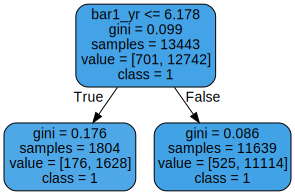

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(GR.best_estimator_, out_file=None, 
            filled=True, rounded=True, feature_names=feature_columns, class_names=['0','1','2'])

graph = graphviz.Source(dot_data)  
graph

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=6,oob_score=True,random_state=42,criterion='entropy',max_features='auto',n_estimators=300)
rf.fit(x_train, y_train)
y_test_pred_rf=rf.predict(x_test)
y_train_pred_rf=rf.predict(x_train)

print("Random Forest Train score with ",format(rf.score(x_train, y_train)))

Random Forest Train score with  0.9874284013984974


In [ ]:
train_test_rf_error = pd.concat([multiple_measure_error(y_train, y_train_pred_rf, 'train'),
                                 multiple_measure_error(y_test, y_test_pred_rf, 'test')],
                                axis=1)

train_test_rf_error

,train,test
accuracy,0.987428,0.983822
precision,0.993455,0.991609
recall,0.879458,0.845085
f1,0.987428,0.983822


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 25, 30, 35, 40, 50, 100, 150, 200]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(x_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.004538
20.0,0.002306
25.0,0.001413
30.0,0.001339
35.0,0.000818
40.0,0.000818
50.0,0.000223
100.0,0.000074
150.0,0.000074


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

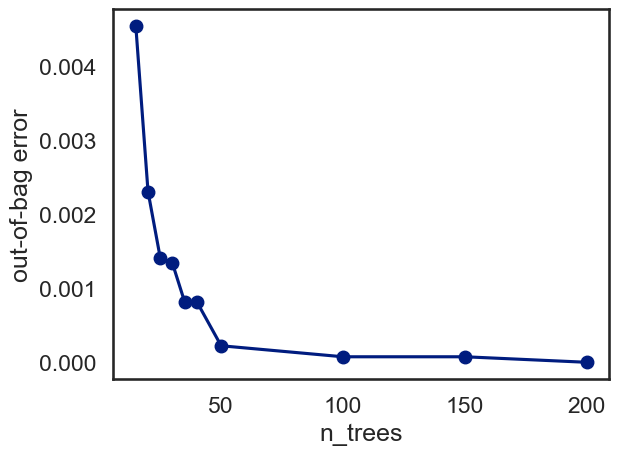

In [ ]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

Extra random treee

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 25, 30, 35, 40, 50, 100, 150, 200]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(x_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.004463
20.0,0.002157
25.0,0.000967
30.0,0.001265
35.0,0.000669
40.0,0.000669
50.0,0.000298
100.0,0.000000
150.0,0.000074


In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.004538,0.004463
20.0,0.002306,0.002157
25.0,0.001413,0.000967
30.0,0.001339,0.001265
35.0,0.000818,0.000669
40.0,0.000818,0.000669
50.0,0.000223,0.000298
100.0,0.000074,0.000000
150.0,0.000074,0.000074


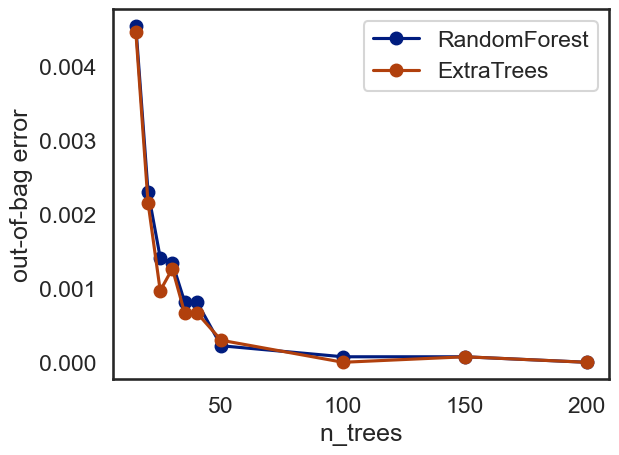

In [ ]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = oob_df.plot(marker='o')
ax.set(ylabel='out-of-bag error');

In [ ]:
# Extra Random forest with 100 estimators
model = EF.set_params(n_estimators=100)

y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       468
        True       1.00      1.00      1.00      8495

    accuracy                           1.00      8963
   macro avg       1.00      1.00      1.00      8963
weighted avg       1.00      1.00      1.00      8963

   accuracy  precision  recall   f1  auc
0       1.0        1.0     1.0  1.0  1.0


Plotting the confusion matrix

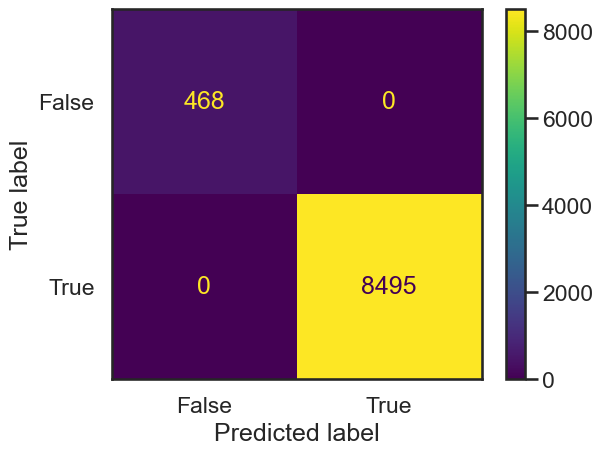

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(x_train, y_train)

y_pred_logr = logr.predict(x_test)

accuracy_score(y_test, y_pred_logr)

0.988954591096731

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
logr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(x_train, y_train)

y_pred_logr_l1 = logr_l1.predict(x_test)

accuracy_score(y_test, y_pred_logr_l1)

1.0

L2 regularized logistic regression


In [ ]:
logr_l1_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(x_train, y_train)

y_pred_logr_l2 = logr_l1_l2.predict(x_test)

accuracy_score(y_test, y_pred_logr_l2)

1.0

KNN

In [ ]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_array = []
for k in range (1,1000,2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn = knn.fit(x_train, y_train)
  y_knn_pred = knn.predict(x_test)

  accuracy_array.append((k, accuracy_score(y_test, y_knn_pred)))

accuracy_df = pd.DataFrame(accuracy_array, columns=['k', 'accuracy'])

accuracy_df.sort_values(by='accuracy', ascending=False)

,k,accuracy
68,137,0.948455
70,141,0.948343
67,135,0.948232
72,145,0.948232
69,139,0.948120
...,...,...
24,49,0.946893
3,7,0.946335
2,5,0.945331
1,3,0.940533


In [ ]:
accuracy_df

,k,accuracy
0,1,0.924579
1,3,0.940533
2,5,0.945331
3,7,0.946335
4,9,0.947451
...,...,...
495,991,0.947785
496,993,0.947785
497,995,0.947785
498,997,0.947785
